In [1]:
%load_ext autoreload
%autoreload 2
from dpe import DPE
from lib_data import *
import matplotlib.pyplot as plt
import numpy as np
from lib_nn_dpe import NN_dpe
from IPython import display

import serial
%config InlineBackend.figure_formats = ['svg']

import matplotlib
matplotlib.rcParams['font.sans-serif'] = "Arial"

In [2]:
dpe = DPE('COM3')
dpe.set_clock(50)
dpe.shape

DAC initialized to a span from -10 V to 10 V
Setting vrefs to default
Setting ADC_CK freq=50000.0kHz
Setting CK_ARRAY freq=50000.0kHz


[64, 64]

....

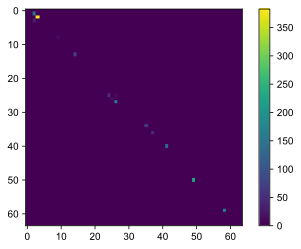

In [4]:
g = dpe.read(2, Tdly=1000)
plt.imshow(g * 1e6)
plt.colorbar()

In [8]:
from scipy.io import loadmat
data_mat = loadmat('data/W_test.mat')

W_test = data_mat['W_test']

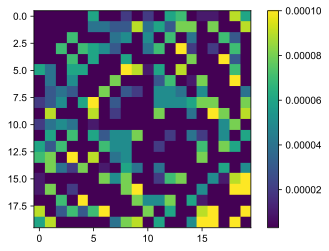

In [11]:
plt.imshow(W_test); plt.colorbar()

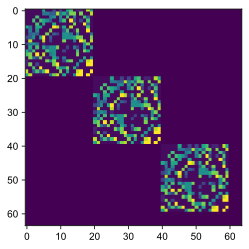

In [29]:
N = 64

Gtarget = np.ones((N,N)) * 0e-6
Gtarget[:W_test.shape[0], :W_test.shape[1]] = W_test
Gtarget[W_test.shape[0]*1:W_test.shape[0]*2, W_test.shape[1]*1:W_test.shape[1]*2 ] = W_test
Gtarget[W_test.shape[0]*2:W_test.shape[0]*3, W_test.shape[1]*2:W_test.shape[1]*3 ] = W_test

Msel = Gtarget > 0

plt.imshow(Gtarget)

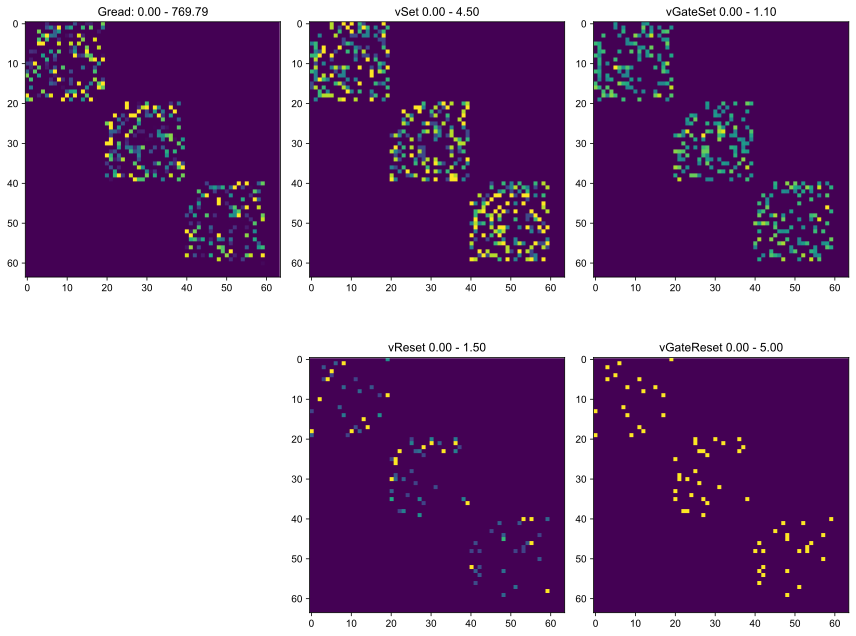

St-art programming, step=150, maxBound=109 yield= 59.00%
Setting 317 devices...
Programming with external timing Twidth=1000.000 us
Resetting 66 devices...
Programming with external timing Twidth=1000.000 us
..

In [ ]:
def myplot(data):
    Gread = data['Ghist'][-1]
    vSet = data['vSetHist'][-1]
    vGateSet = data['vGateSetHist'][-1]
    vReset = data['vResetHist'][-1]
    vGateReset = data['vGateResetHist'][-1]
    
    
    plt.figure(1, figsize=(12,10))
    plt.subplot(2,3,1)
    plt.imshow(Gread * 1e6)
    plt.title(f'Gread: {Gread.min()*1e6:.2f} - {Gread.max()*1e6:.2f}')
    plt.clim(0, 100)
    
    plt.subplot(2,3,2)
    plt.imshow(vSet)
    plt.title(f'vSet {vSet.min():.2f} - {vSet.max():.2f}')
    
    plt.subplot(2,3,3)
    plt.imshow(vGateSet )
    plt.title(f'vGateSet {vGateSet.min():.2f} - {vGateSet.max():.2f}')
    
    plt.subplot(2,3,5)
    plt.imshow(vReset)
    plt.title(f'vReset {vReset.min():.2f} - {vReset.max():.2f}')
    
    plt.subplot(2,3,6)
    plt.imshow(vGateReset )
    plt.title(f'vGateReset {vGateReset.min():.2f} - {vGateReset.max():.2f}')
    
    plt.tight_layout()
    
    display.clear_output(wait=True)
    display.display(plt.gcf())

data = dpe.tune_conductance(2,  Gtarget, saveHistory=True, maxSteps=200, method='slow', plot_callback=myplot,
                           vSetRamp=[1, 4.5, 1], Twidth=1e-3, Msel=Msel)

In [22]:
g = dpe.read(2)

....

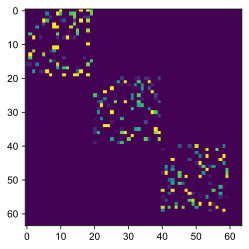

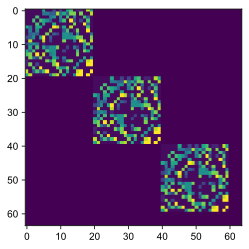

In [24]:
plt.figure(1)
plt.imshow(g)
plt.clim((0, 100e-6))

plt.figure(2)
plt.imshow(Gtarget)